## Emphasis:

Probability Concepts:

- Random Variable
- Discrete Distribution
- Contintuous Distribution
- Probability Mass Function (pmf)
- Probability Density Function (pdf)
- Cumulative Distribution Function (cdf)
- Intuitive understanding of Central Limit Theroem visualized (and an exception)
   
    
Python Utilization:

- Graphing axes
- Scipy.stats library
    - pdf,pmf,cdf
- List comprehensions
- Quad
    
    

In [1]:
import pandas as pd
import numpy  as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import quad

%matplotlib inline

//anaconda/envs/dsi/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Random Variables

Random Variables are quantities  that can take on values and have associated probabilities with taking on those values.  For example, you can design an experiment where a coin is flipped and is assigned a number for head, say 1 and a number for tails, say 0.  The number of travellers arriving at a BART station can be considered a Random Variable, say Y.   The probability distribution for those arrivals is dependent on one's assumptions.

Random variables can at a high level are generaly divided into two categories:

1) Discrete Random Variables are random variables whose outcome is countable.  For example
if you have an experiment where you pull a card from a deck of cards, and assign the Random Variable Y the rank of the card then this would be an example of a Discrete Random Variable.   With each of the possible outcomes there is a corresponding probability.  For a discrete distribution the outcome probability function is called a probability mass function.

2) Continuous Random variables are random variables whose outcomes are not countable.  For example if T is a random variable that represents the temperatue at 12:00 on a given day, then there is not an exact temperature and associated probability, nor is the number of outcomes countable.    We would say that T is a continuous random variable and probabilities would be calculated by measuring areas under it's probability function.  For a continuous random vairable the probability function is called the probability density function.

Each of these random variables will have a cumulative distribution function that shows the cumulative probability over the outcomes.  Any point on the cumulative distribution function will represent the probability that the random variable is less than or equal to a value.  Example:  P(Y <= y).  (Note Random Variables are usually refenced by single capital letters.)

There are many random variables that have evolved over time which have their own distributions in closed form.   You have all head of the normal curve as one of those distributions.  There are many more and few are detailed below.  
      

Random Variable Distribution:  Uniform discrete

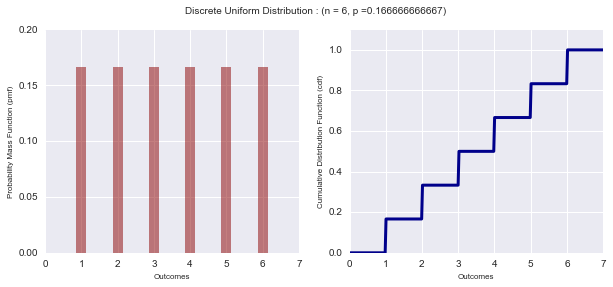

In [2]:
low = 1
high = 6
n = high-low + 1
p = 1.0/n
du = stats.randint(low,high+1)
x = np.arange(low-1,high+2)

fig, ax_array = plt.subplots(1, 2, figsize=(10,4))

ax_array[0].set_ylim(0,1.2*p)
ax_array[0].set_xlim(low-1,high+1)
ax_array[0].set_xlabel('Outcomes', fontsize=8)
ax_array[0].set_ylabel('Probability Mass Function (pmf)',fontsize=8)
ax_array[0].vlines(x, 0, du.pmf(x), colors='darkred', lw=10, alpha=0.5)

ax_array[1].set_ylim(0,1.1)
ax_array[1].set_xlim(low-1,high+1)
ax_array[1].set_xlabel('Outcomes', fontsize=8)
ax_array[1].set_ylabel('Cumulative Distribution Function (cdf)',fontsize=8)

x = np.linspace(low-1,high+1, 300)
ax_array[1].plot(x,du.cdf(x),lw=3,color='darkblue')

Title = 'Discrete Uniform Distribution : (n = '+str(n)+", p ="+str(p)+")"
plt.suptitle(Title)

plt.show()




Random Variable Distribution:  Binomial

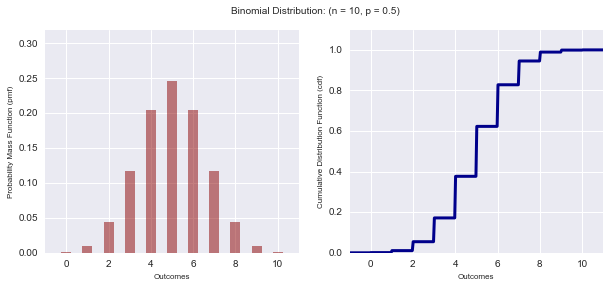

In [3]:
n = 10
p = .5
bino = stats.binom(n, p)
x = np.arange(0,n+1)

fig, ax_array = plt.subplots(1, 2, figsize=(10,4))

ax_array[0].set_ylim(0,1.3*bino.pmf(n*p))
ax_array[0].set_xlim(-1,n+1)
ax_array[0].set_xlabel('Outcomes', fontsize=8)
ax_array[0].set_ylabel('Probability Mass Function (pmf)',fontsize=8)
ax_array[0].vlines(x, 0, bino.pmf(x), colors='darkred', lw=10, alpha=0.5)

ax_array[1].set_ylim(0,1.1)
ax_array[1].set_xlim(-1,n+1)
ax_array[1].set_xlabel('Outcomes', fontsize=8)
ax_array[1].set_ylabel('Cumulative Distribution Function (cdf)',fontsize=8)

x = np.linspace(-1,n+1, 300)
ax_array[1].plot(x,bino.cdf(x),lw=3,color='darkblue')

Title = 'Binomial Distribution: (n = '+str(n)+", p = "+str(p)+")"
plt.suptitle(Title)

plt.show()

Random Variable Distribution:  Poisson

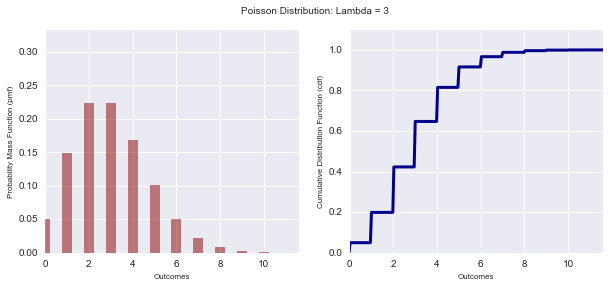

In [4]:
lambdaforp = 3
poi = stats.poisson(lambdaforp)
x = np.arange(0,4*lambdaforp)

fig, ax_array = plt.subplots(1, 2, figsize=(10,4))

ax_array[0].set_ylim(0.,1./lambdaforp)
ax_array[0].set_xlim(0,2.2*lambdaforp+5)
ax_array[0].set_xlabel('Outcomes', fontsize=8)
ax_array[0].set_ylabel('Probability Mass Function (pmf)',fontsize=8)
ax_array[0].vlines(x, 0, poi.pmf(x), colors='darkred', lw=10, alpha=0.5)

ax_array[1].set_ylim(0,1.1)
ax_array[1].set_xlim(0,2.2*lambdaforp+5)
ax_array[1].set_xlabel('Outcomes', fontsize=8)
ax_array[1].set_ylabel('Cumulative Distribution Function (cdf)',fontsize=8)

x = np.linspace(-1,4.2*lambdaforp+1, 300)
ax_array[1].plot(x,poi.cdf(x),lw=3,color='darkblue')

Title = 'Poisson Distribution: Lambda = '+str(lambdaforp)
plt.suptitle(Title)

plt.show()

Random Variable Distribution:  Uniform (Continuous)

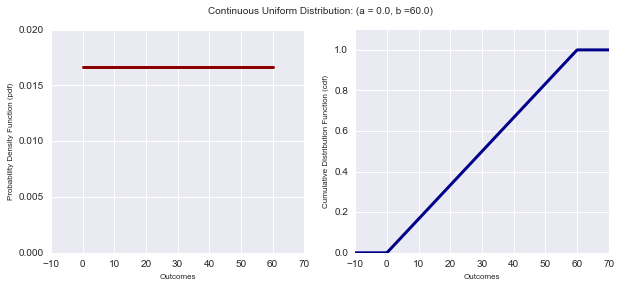

In [5]:
a = 0.
b = 60.
uni = stats.uniform(a,b)
x_vals = np.linspace(a,b,150)

fig, ax_array = plt.subplots(1, 2, figsize=(10,4))

ax_array[0].set_ylim(0,1/(b-a)*1.2)
ax_array[0].set_xlim(a-10,b+10)
ax_array[0].set_xlabel('Outcomes', fontsize=8)
ax_array[0].set_ylabel('Probability Density Function (pdf)',fontsize=8)
ax_array[0].plot(x_vals,uni.pdf(x_vals),lw=3,color='darkred')

ax_array[1].set_ylim(0,1.1)
ax_array[1].set_xlim(a-10,b+10)
ax_array[1].set_xlabel('Outcomes', fontsize=8)
ax_array[1].set_ylabel('Cumulative Distribution Function (cdf)',fontsize=8)

x = np.linspace(a-10,b+10, 300)
ax_array[1].plot(x,uni.cdf(x),lw=3,color='darkblue')

Title = 'Continuous Uniform Distribution: (a = '+str(a)+", b ="+str(b)+")"
plt.suptitle(Title)

plt.show()

Random Variable Distribution:  Normal (aka Gaussian)

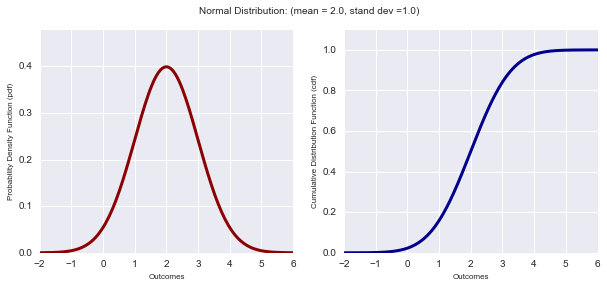

In [6]:
mu = 2.0
std = 1.0
normal = stats.norm(loc=mu,scale=std)
x_vals = np.linspace(mu-4*std,mu+4*std,150)

fig, ax_array = plt.subplots(1, 2, figsize=(10,4))

ax_array[0].set_ylim(0,1.2*normal.pdf(mu))
ax_array[0].set_xlim(mu-4*std,mu+4*std)
ax_array[0].set_xlabel('Outcomes', fontsize=8)
ax_array[0].set_ylabel('Probability Density Function (pdf)',fontsize=8)
ax_array[0].plot(x_vals,normal.pdf(x_vals),lw=3,color="darkred")

ax_array[1].set_ylim(0,1.1)
ax_array[1].set_xlim(mu-4*std,mu+4*std)
ax_array[1].set_xlabel('Outcomes', fontsize=8)
ax_array[1].set_ylabel('Cumulative Distribution Function (cdf)',fontsize=8)

x = np.linspace(mu-4*std,mu+4*std, 300)
ax_array[1].plot(x,normal.cdf(x),lw=3,color='darkblue')

Title = 'Normal Distribution: (mean = '+str(mu)+", stand dev ="+str(std)+")"
plt.suptitle(Title)

plt.show()

Random Variable Distribution: Exponential

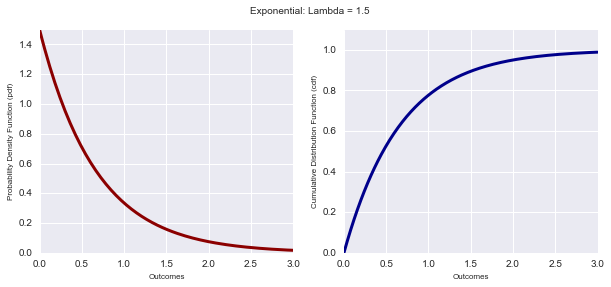

In [7]:
lambda_param = 1.5
expo = stats.expon(loc=0, scale = 1/lambda_param)
x_vals = np.linspace(0,3*lambda_param,150)

fig, ax_array = plt.subplots(1, 2, figsize=(10,4))

ax_array[0].set_ylim(0,lambda_param)
ax_array[0].set_xlim(0,mu+1.5*1/lambda_param)
ax_array[0].set_xlabel('Outcomes', fontsize=8)
ax_array[0].set_ylabel('Probability Density Function (pdf)',fontsize=8)
ax_array[0].plot(x_vals,expo.pdf(x_vals),lw=3,color='darkred')

ax_array[1].set_ylim(0,1.1)
ax_array[1].set_xlim(0,mu+1.5*1/lambda_param)
ax_array[1].set_xlabel('Outcomes', fontsize=8)
ax_array[1].set_ylabel('Cumulative Distribution Function (cdf)',fontsize=8)

x = np.linspace(0,mu+1.5*1/lambda_param, 300)
ax_array[1].plot(x,expo.cdf(x),lw=3,color='darkblue')

Title = 'Exponential: Lambda = '+str(lambda_param)+""
plt.suptitle(Title)

plt.show()

Random Variable Distribution: Beta

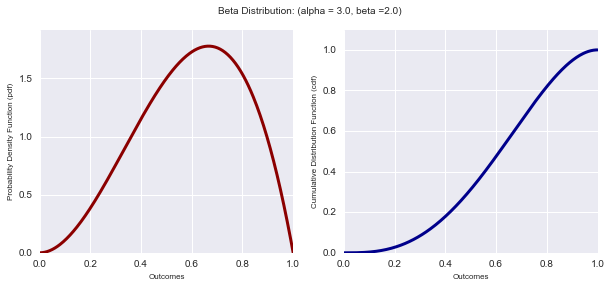

In [8]:

alpha = 3.0
beta = 2.0
mu = alpha / (alpha + beta)
std = (alpha*beta)/(((alpha+beta)**2)*(alpha+beta-1))

betadis = stats.beta(alpha,beta)
x_vals = np.linspace(0,1, 300)

fig, ax_array = plt.subplots(1, 2, figsize=(10,4))

ax_array[0].set_ylim(0,betadis.mean()*3.2)
ax_array[0].set_xlim(0,1)
ax_array[0].set_xlabel('Outcomes', fontsize=8)
ax_array[0].set_ylabel('Probability Density Function (pdf)',fontsize=8)
ax_array[0].plot(x_vals,betadis.pdf(x_vals),lw=3,color="darkred")

ax_array[1].set_ylim(0,1.1)
ax_array[1].set_xlim(0,1)
ax_array[1].set_xlabel('Outcomes', fontsize=8)
ax_array[1].set_ylabel('Cumulative Distribution Function (cdf)',fontsize=8)

x = np.linspace(0,1, 300)
ax_array[1].plot(x,betadis.cdf(x),lw=3,color='darkblue')

Title = 'Beta Distribution: (alpha = '+str(alpha)+", beta ="+str(beta)+")"
plt.suptitle(Title)

plt.show()

Assumption:  Meteors arrive at a rate of 1.5 per hour; the time between arrivals can be approximated by the the exponential distibution.  What is the expected time between arrivals?

In [9]:
param = 1.5
expo = stats.expon(loc=0, scale = 1/param)
print "mean: ",expo.mean()*60, 'minutes'

# What is the median in minutes
print "median: ", expo.ppf(.50)*60, 'minutes'

#based on this result, what is the skew?   Is it consistent with the Exponential distributin Graphgraph?

mean:  40.0 minutes
median:  27.7258872224 minutes


What is the probability that the number of of meteors that arrive in a given hour exceed 5?  Assume a Poisson distribution

In [10]:
lambdaforp = 2
poi = stats.poisson(lambdaforp)
1-poi.cdf(5)

0.016563608480614445

what is the probability that a random variable ~(distributed) Normal(0,1) falls between +- 1.96

In [11]:
mu = 0.0
std = 1.0
normal = stats.norm(loc=mu,scale=std)

print normal.cdf(1.96)-normal.cdf(-1.96)

#or integrating for you calculus buffs

ans, err = quad(normal.pdf, -1.96, 1.96)
print ans

#Note:  you generally will not have to integrate anything given you
# can derive the probabilities form the built in functions.  More to 
# make you aware of the functionality if you by chance need it.


0.950004209704
0.950004209704


What is the 95th percentile for the same distribution?

In [12]:
normal.ppf(.95)

1.6448536269514722

Use the discrete uniform distributiom to model the throw
of a single die.  What is the probability the die is either a 3 or a 4?

In [13]:
low = 1
high = 6
n = high-low+1
p = 1.0/n
du = stats.randint(low,high+1)
print du.pmf(3)+ du.pmf(4)
#or
du.cdf(4)-du.cdf(2)



0.333333333333


0.33333333333333331

In [14]:
# the number of wheels that fall of of vehicles on a certain stretch of highway 50 is closely modelled
# Poisson distribution with lambda = 1 (per month)

# What is the expected value of wheels falling of a vehicle in a given month.  What is the probabality that 
# the number of wheels following are greather than or equal two but les than 5?  What is the probability the number is greater than 6:

In [15]:
lambdaforp = 1
poi = stats.poisson(lambdaforp)
print "Expected value:  ", poi.mean()
print "Probability of wheels are greater than or equal to 2 but less than 5 ", poi.cdf(4) - poi.cdf(1)
#alternatively
print "Alternate calc: ", poi.pmf(2) + poi.pmf(3) + poi.pmf(4)
print "\nProbability of > 6:", 1-poi.cdf(6)

Expected value:   1.0
Probability of wheels are greater than or equal to 2 but less than 5  0.26058127083
Alternate calc:  0.26058127083

Probability of > 6: 8.3241149288e-05


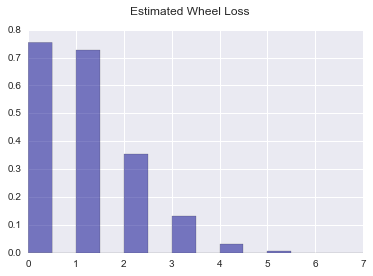

In [16]:
# Use a random number generator to graph the above Wheel distribution.  Trials = 10000

import numpy as np
import matplotlib.pyplot as plt

trials = 10000

s = np.random.poisson(lambdaforp,trials)
count, bins, ignored = plt.hist(s, 14, normed=True, color = "darkblue",alpha=.5)
title = "Estimated Wheel Loss"
plt.suptitle(title,fontsize = 12)
plt.show()


Pitcher has a 95% strike rate (95% of the time they hits the target).  What is the probability that they have 90 or less
strikes after throwing 100 pitches

In [17]:
n = 100
r = 90
p = .95
bino = stats.binom(n, p)
pr = bino.cdf(r)
print "Probability of less than or equal to",r,"strikes: ", pr

Probability of less than or equal to 90 strikes:  0.0281882941634


Graph 4 distrubitions 2 continuous and 2 discrete with varying "shape".   Then sample from these distributions and graph the results to visualize the Central Limit Theroem.

In [18]:
geo_p = .3
log_ser_p = .95
lp = 3
alpha = 3.0
beta = 1.5
pareto_param = 2.0

logser = stats.logser(log_ser_p)
poi = stats.poisson(lp)
beta_dis = stats.beta(alpha,beta)
pareto_dis = stats.pareto(pareto_param)

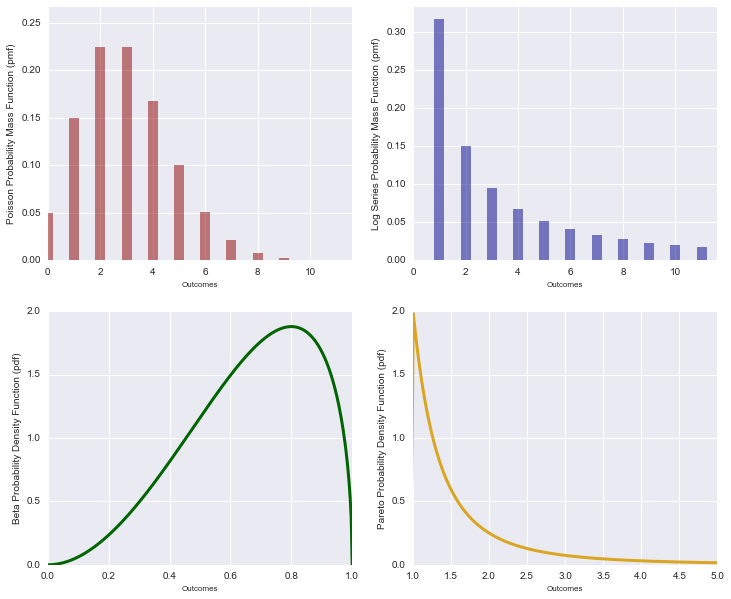

In [19]:
fig, ax_array = plt.subplots(2, 2, figsize=(12,10))

x = np.arange(0,4*lp)

ax_array[0][0].set_ylim(0.,.8/lp)
ax_array[0][0].set_xlim(0,2.2*lp+5)
ax_array[0][0].set_xlabel('Outcomes', fontsize=8)
ax_array[0][0].set_ylabel('Poisson Probability Mass Function (pmf)',fontsize=10)
ax_array[0][0].vlines(x, 0, poi.pmf(x), colors='darkred', lw=10, alpha=0.5)

x = np.arange(0,12)
ax_array[0][1].set_ylim(0.0,logser.pmf(1)*1.05)
ax_array[0][1].set_xlim(0,2.2*lp+5)
ax_array[0][1].set_xlabel('Outcomes', fontsize=8)
ax_array[0][1].set_ylabel('Log Series Probability Mass Function (pmf)',fontsize=10)
ax_array[0][1].vlines(x, 0, logser.pmf(x), colors='darkblue', lw=10, alpha=0.5)


std = (alpha*beta)/(((alpha+beta)**2)*(alpha+beta-1))
                    
x_vals = np.linspace(0,1, 300)

#ax_array[1][0].set_ylim(0,beta_dis.pdf((alpha-1.)/(alpha+beta-2.))*1.2)
ax_array[1][0].set_ylim(0,beta_dis.mean()*3)
ax_array[1][0].set_xlim(0,1)
ax_array[1][0].set_xlabel('Outcomes', fontsize=8)
ax_array[1][0].set_ylabel('Beta Probability Density Function (pdf)',fontsize=10)
ax_array[1][0].plot(x_vals,beta_dis.pdf(x_vals),lw=3,color="darkgreen")

x_vals = np.linspace(0,10, 300)
ax_array[1][1].set_ylim(0,2)
ax_array[1][1].set_xlim(1,5)
ax_array[1][1].set_xlabel('Outcomes', fontsize=8)
ax_array[1][1].set_ylabel('Pareto Probability Density Function (pdf)',fontsize=10)
ax_array[1][1].plot(x_vals,pareto_dis.pdf(x_vals),lw=3,color="goldenrod")


#Title = 'Binomial Distribution: (n = '+str(n)+", p = "+str(p)+")"
#plt.suptitle(Title)

plt.show()

In [23]:
# Sample multiple times from each of the distributions, and collect the averages

iterations = 1000000
p= .5
sample_size = 100
x=np.random.binomial(n,p,sample_size)


poip = np.random.poisson(lp,sample_size).mean()
parp = np.random.pareto(pareto_param,sample_size).mean()
logp = np.random.logseries(log_ser_p,sample_size).mean()
betap = np.random.beta(alpha,beta,sample_size).mean()

poi_means = []
par_means = []
log_means = []
beta_means =[]


In [ ]:
#create lists of means using list comprehensions

poi_means = [np.random.poisson(lp,sample_size).mean() for x in range(0,iterations)]
par_means = [np.random.pareto(pareto_param,sample_size).mean() for x in range(0,iterations)]
log_means = [np.random.logseries(log_ser_p,sample_size).mean() for x in range(0,iterations)]
beta_means = [np.random.beta(alpha,beta,sample_size).mean() for x in range(0,iterations)]

In [ ]:
fig, ax_array = plt.subplots(2, 2, figsize=(12,10))

ax_array[0][0].set_xlabel('Outcomes', fontsize=8)
ax_array[0][0].set_ylabel('Poisson Sample Means',fontsize=8)
ax_array[0][0] = sns.distplot(poi_means, bins=50, hist=True, kde=False,
                   ax=ax_array[0][0])


ax_array[0][1].set_xlabel('Outcomes', fontsize=8)
ax_array[0][1].set_ylabel('Log Series Sample Means',fontsize=8)
ax_array[0][1] = sns.distplot(log_means, bins=50, hist=True, kde=False,color='darkred',
                    ax=ax_array[0][1])

ax_array[1][0].set_xlabel('Outcomes', fontsize=8)
ax_array[1][0].set_ylabel('Beta Sample Means',fontsize=8)
ax_array[1][0] = sns.distplot(beta_means, bins=50, hist=True, kde=False,color='darkgreen',
                    ax=ax_array[1][0])


ax_array[1][1].set_xlabel('Outcomes', fontsize=8)
ax_array[1][1].set_ylabel('Pareto Sample Means',fontsize=8)
ax_array[1][1].set_xlim(0,2)
ax_array[1][1] = sns.distplot(par_means, bins=5000, hist=True, kde=False,color='goldenrod',
                    ax=ax_array[1][1])

Title = 'Sample average distplots from very different distribution types'
plt.suptitle(Title,fontsize=20)

plt.show()

As you can see from the activity above the sample means are distributed fairly "bell-shaped".  Although not a proof this is a visual that will help you form an intuitive understanding of the Central Limit Theroem.  

Also note that the Pareto distribution given certain parameters does not satisfy the CLT.    Can you see that from the Pareto graph?